In [1]:
from tests.heat_eqn.save_experiments import ExperimentData
from tests.heat_eqn.rescale_solutions import load_rescaled_data
# from tests.heat_eqn.plotting import (plot_1d_evolution_periodic_bc,
#                                      plot_1d_evolution_zero_bc,
#                                      add_time_color_bar,
#                                      add_text,
#                                      plot_stat_figures,
#                                      time_colormap
#                                      )
from tests.heat_eqn.plotting import *

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a4_width  = 8.3
a4_height = 11.7

# Solutions to 1D Heat Equation

In [3]:
from tests.heat_eqn.input_handler import get_inputs

for expt in get_inputs('0.8_alpha.json'):
    print(expt.f0)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


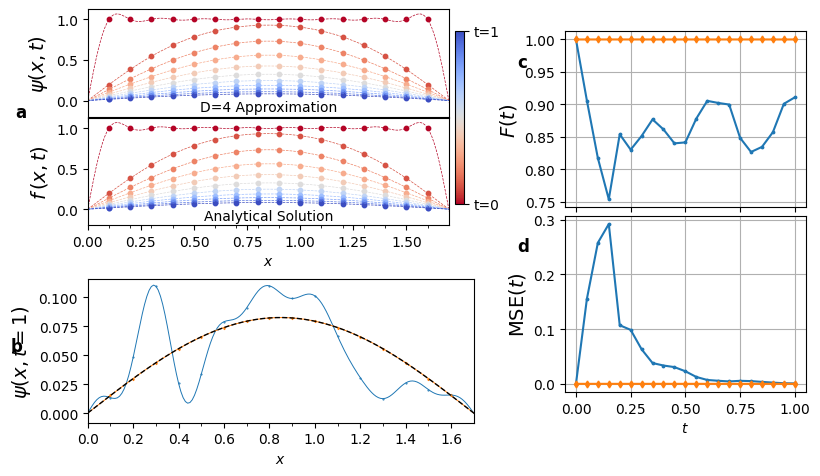

In [7]:
files = ['6 qubit square wave alpha=0.8', '6 qubit square wave alpha=0.8']
expt_data = load_rescaled_data('data/heat_eqn/alpha=0.8/', '4 qubit square wave alpha=0.8', 1)
# Nt = np.int32(np.ceil(expt_data.T/expt_data.dt))
# Nx = expt_data.f0.shape[0]
Nd,Nt,Nx = expt_data.qite_sols.shape
expt_data.periodic_bc_flag
a4_width  = 8.3
a4_height = 11.7
fig_height_ratio = 1/2.5
tsplit = 20
time_slice = slice(0,Nt+tsplit, Nt//tsplit)

figure = plt.figure(figsize=(a4_width,fig_height_ratio*a4_height))

sol_fig, stat_fig = figure.subfigures(1, 2, width_ratios=[1.5,1], wspace=0.0)

evo_fig, d_fig = sol_fig.subfigures(2,1, height_ratios=[1.5,1])

evo_axs = evo_fig.subplots(2,1,sharex=True)
d_ax = d_fig.subplots(1)
stat_axs = stat_fig.subplots(2,1,sharex=True)

plot_1d_evolution(evo_axs[0],
                  expt_data.f0,
                  expt_data.num_qbits[0],
                  expt_data.periodic_bc_flag[0],
                  expt_data.qite_sols[-1],
                  sample_x:=(np.arange(1,Nx+1) if not expt_data.periodic_bc_flag else np.arange(Nx))*expt_data.dx[0],
                  expt_data.dx[0], expt_data.L[0],
                  times:=np.arange(0,Nt+1)*expt_data.dt,
                  plot_times:=np.arange(0,Nt+1,(Nt+1)//10))
plot_1d_evolution(evo_axs[1], 
                  expt_data.f0,
                  expt_data.num_qbits[0],
                  expt_data.periodic_bc_flag[0],
                  expt_data.analytical_sol,
                  sample_x,
                  expt_data.dx[0], expt_data.L[0],
                  times, plot_times)

add_text(evo_axs[0],0.5,0.05,f'D={expt_data.D_list[-1]} Approximation',size=10,horizontalalignment='center')
add_text(evo_axs[1],0.5,0.05,f'Analytical Solution',size=10,horizontalalignment='center')

cb = plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(0,expt_data.T), cmap=time_colormap),
             ax=evo_axs.ravel().tolist(),
             location='right',orientation='vertical',
             shrink=0.8,aspect=20,anchor=(0.8,0.5))
cb.set_ticks([0,expt_data.T])
cb.set_ticklabels(['t=0', 't=1'])

# xrange =(np.arange(1,Nx+1) if not expt_data.periodic_bc_flag else np.arange(Nx) )*expt_data.dx
dense_x = np.arange(0,expt_data.L[0]+expt_data.dx[0]/10,expt_data.dx[0]/10)

for Di,D in enumerate(expt_data.D_list):
    qsol = expt_data.qite_sols[Di][-1]
    
    iqsol = get_interpolation_1d(qsol, expt_data.num_qbits[0],
                                 expt_data.periodic_bc_flag[0],
                                 dense_x, expt_data.L[0])
    
    l, = d_ax.plot(dense_x, iqsol, label=f'{D=}', linewidth=0.7, alpha=1.0)
    d_ax.scatter(sample_x,qsol, marker=plt_markers[Di], color=l.get_color(), s=1.0)

asol = expt_data.analytical_sol[-1]
iasol = get_interpolation_1d(asol,expt_data.num_qbits[0],
                             expt_data.periodic_bc_flag[0], 
                             dense_x, expt_data.L[0])

d_ax.plot(dense_x, iasol, label='$f\,(x,1)$', linewidth=1.0, linestyle='--', color='k')

for Di,D in enumerate(expt_data.D_list):
    stat_axs[0].plot(times[time_slice], expt_data.stat_data[0,Di,time_slice],marker=plt_markers[Di],markersize=3.5, label=f'{D=}')
    stat_axs[1].plot(times[time_slice], expt_data.stat_data[2,Di,time_slice],marker=plt_markers[Di],markersize=3.5, label=f'{D=}')

stat_axs[0].grid(True)
stat_axs[1].grid(True)

evo_axs[0].set_xlim([0.0,expt_data.L[0]])
evo_axs[0].set_xticks(np.arange(0,expt_data.L[0],expt_data.dx[0]),minor=True)
d_ax.set_xlim([0.0, expt_data.L[0]])
d_ax.set_xticks(np.arange(0,expt_data.L[0],expt_data.dx[0]),minor=True)
# d_ax.set_ylim([-0.2, 2.2])

# stat_axs[0].set_ylim([0.65,1.01])

evo_axs[0].set_ylabel(r'$\psi(x,t)$', fontsize=14)
evo_axs[1].set_ylabel(r'$f\,(x,t)$', fontsize=14)
d_ax.set_ylabel(r'$\psi(x,t=1)$', fontsize=14)

stat_axs[0].set_ylabel(r'$F(t)$', fontsize=14)
stat_axs[1].set_ylabel(r'MSE$(t)$', fontsize=14)

evo_axs[-1].set_xlabel(r'$x$')
d_ax.set_xlabel(r'$x$')
# stat_axs[0].set_xlabel('$t$')
stat_axs[1].set_xlabel('$t$')

evo_fig.subplots_adjust(hspace=0.01,right=0.85)
stat_fig.subplots_adjust(hspace=0.05)#,top=0.75,bottom=0.25,wspace=0.5)

add_text(evo_axs[0], -0.2, 0.0, 'a', weight='bold')
add_text(d_ax, -0.2, 0.5, 'b', weight='bold')
add_text(stat_axs[0], -0.2, 0.8, 'c', weight='bold')
add_text(stat_axs[1], -0.2, 0.8, 'd', weight='bold')

figpath = 'figs/heat_eqn/paper_figs/'
figname = 'square_wave'
plt.savefig(figpath+figname+'.svg',dpi=300, bbox_inches='tight')
plt.savefig(figpath+figname+'.png',dpi=300, bbox_inches='tight')

plt.show()

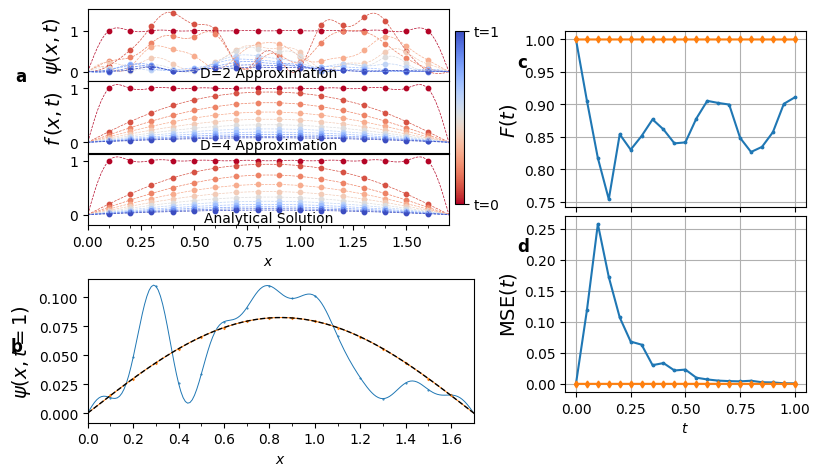

In [11]:
files = ['6 qubit square wave alpha=0.8', '6 qubit square wave alpha=0.8']
expt_data = load_rescaled_data('data/heat_eqn/alpha=0.8/', '4 qubit square wave alpha=0.8', 20)
# Nt = np.int32(np.ceil(expt_data.T/expt_data.dt))
# Nx = expt_data.f0.shape[0]
Nd,Nt,Nx = expt_data.qite_sols.shape
expt_data.periodic_bc_flag
a4_width  = 8.3
a4_height = 11.7
fig_height_ratio = 1/2.5
tsplit = 20
time_slice = slice(0,Nt+tsplit, Nt//tsplit)

figure = plt.figure(figsize=(a4_width,fig_height_ratio*a4_height))

sol_fig, stat_fig = figure.subfigures(1, 2, width_ratios=[1.5,1], wspace=0.0)

evo_fig, d_fig = sol_fig.subfigures(2,1, height_ratios=[1.5,1])

evo_axs = evo_fig.subplots(expt_data.D_list.shape[0]+1,1,sharex=True)
d_ax = d_fig.subplots(1)
stat_axs = stat_fig.subplots(2,1,sharex=True)

for Di,D in enumerate(expt_data.D_list):
    plot_1d_evolution(evo_axs[Di],
                    expt_data.f0,
                    expt_data.num_qbits[0],
                    expt_data.periodic_bc_flag[0],
                    expt_data.qite_sols[Di],
                    sample_x:=(np.arange(1,Nx+1) if not expt_data.periodic_bc_flag else np.arange(Nx))*expt_data.dx[0],
                    expt_data.dx[0], expt_data.L[0],
                    times:=np.arange(0,Nt+1)*expt_data.dt,
                    plot_times:=np.arange(0,Nt+1,(Nt+1)//10))
    
    add_text(evo_axs[Di],0.5,0.05,f'{D=} Approximation',size=10,horizontalalignment='center')
plot_1d_evolution(evo_axs[-1], 
                  expt_data.f0,
                  expt_data.num_qbits[0],
                  expt_data.periodic_bc_flag[0],
                  expt_data.analytical_sol,
                  sample_x,
                  expt_data.dx[0], expt_data.L[0],
                  times, plot_times)


add_text(evo_axs[-1],0.5,0.05,f'Analytical Solution',size=10,horizontalalignment='center')

cb = plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(0,expt_data.T), cmap=time_colormap),
             ax=evo_axs.ravel().tolist(),
             location='right',orientation='vertical',
             shrink=0.8,aspect=20,anchor=(0.8,0.5))
cb.set_ticks([0,expt_data.T])
cb.set_ticklabels(['t=0', 't=1'])

# xrange =(np.arange(1,Nx+1) if not expt_data.periodic_bc_flag else np.arange(Nx) )*expt_data.dx
dense_x = np.arange(0,expt_data.L[0]+expt_data.dx[0]/10,expt_data.dx[0]/10)

for Di,D in enumerate(expt_data.D_list):
    qsol = expt_data.qite_sols[Di][-1]
    
    iqsol = get_interpolation_1d(qsol, expt_data.num_qbits[0],
                                 expt_data.periodic_bc_flag[0],
                                 dense_x, expt_data.L[0])
    
    l, = d_ax.plot(dense_x, iqsol, label=f'{D=}', linewidth=0.7, alpha=1.0)
    d_ax.scatter(sample_x,qsol, marker=plt_markers[Di], color=l.get_color(), s=1.0)

asol = expt_data.analytical_sol[-1]
iasol = get_interpolation_1d(asol,expt_data.num_qbits[0],
                             expt_data.periodic_bc_flag[0], 
                             dense_x, expt_data.L[0])

d_ax.plot(dense_x, iasol, label='$f\,(x,1)$', linewidth=1.0, linestyle='--', color='k')

for Di,D in enumerate(expt_data.D_list):
    stat_axs[0].plot(times[time_slice], expt_data.stat_data[0,Di,time_slice],marker=plt_markers[Di],markersize=3.5, label=f'{D=}')
    stat_axs[1].plot(times[time_slice], expt_data.stat_data[2,Di,time_slice],marker=plt_markers[Di],markersize=3.5, label=f'{D=}')

stat_axs[0].grid(True)
stat_axs[1].grid(True)

evo_axs[0].set_xlim([0.0,expt_data.L[0]])
evo_axs[0].set_xticks(np.arange(0,expt_data.L[0],expt_data.dx[0]),minor=True)
d_ax.set_xlim([0.0, expt_data.L[0]])
d_ax.set_xticks(np.arange(0,expt_data.L[0],expt_data.dx[0]),minor=True)
# d_ax.set_ylim([-0.2, 2.2])

# stat_axs[0].set_ylim([0.65,1.01])

evo_axs[0].set_ylabel(r'$\psi(x,t)$', fontsize=14)
evo_axs[1].set_ylabel(r'$f\,(x,t)$', fontsize=14)
d_ax.set_ylabel(r'$\psi(x,t=1)$', fontsize=14)

stat_axs[0].set_ylabel(r'$F(t)$', fontsize=14)
stat_axs[1].set_ylabel(r'MSE$(t)$', fontsize=14)

evo_axs[-1].set_xlabel(r'$x$')
d_ax.set_xlabel(r'$x$')
# stat_axs[0].set_xlabel('$t$')
stat_axs[1].set_xlabel('$t$')

evo_fig.subplots_adjust(hspace=0.01,right=0.85)
stat_fig.subplots_adjust(hspace=0.05)#,top=0.75,bottom=0.25,wspace=0.5)

add_text(evo_axs[0], -0.2, 0.0, 'a', weight='bold')
add_text(d_ax, -0.2, 0.5, 'b', weight='bold')
add_text(stat_axs[0], -0.2, 0.8, 'c', weight='bold')
add_text(stat_axs[1], -0.2, 0.8, 'd', weight='bold')

figpath = 'figs/heat_eqn/paper_figs/'
figname = 'square_wave'
plt.savefig(figpath+figname+'.svg',dpi=300, bbox_inches='tight')
plt.savefig(figpath+figname+'.png',dpi=300, bbox_inches='tight')

plt.show()

# Effect of K on log norm ratio

In [16]:
import h5py

Ks = [1,20,50,100]
log_ratios = np.zeros((len(Ks)+1,2,1001),np.float64)

with h5py.File('data/heat_eqn/alpha=0.8/4 qubit square wave alpha=0.8.hdf5') as file:
    log_ratios[0][:] = -file['stats/log_norm_ratio'][:]
    for ki,K in enumerate(Ks):
        log_ratios[ki+1][:] = file[f'stats/rescaled_stats/{K=}/log_norm_ratio'][:]

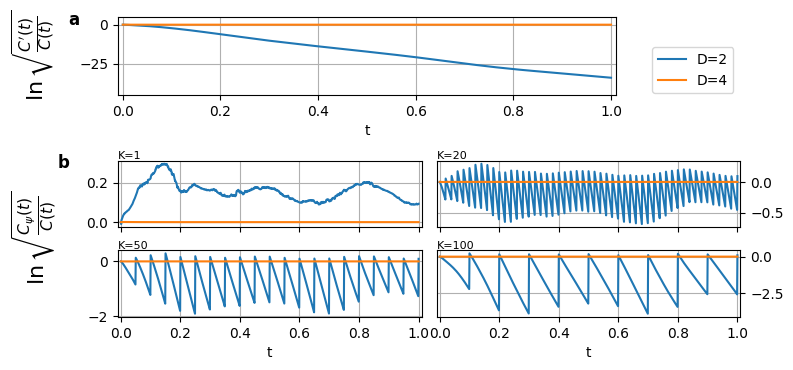

In [19]:
a4_width  = 8.3
a4_height = 11.7
fig_height_ratio = 1/3.5

figure = plt.figure(figsize=(a4_width,fig_height_ratio*a4_height))

topFig,bottomFig = figure.subfigures(2,1,height_ratios=[1,2],hspace=0.2)

time_slice = slice(0,1001,1)

t_ax = topFig.subplots(1)
for Di,D in enumerate(expt_data.D_list):
    t_ax.plot(times[time_slice],log_ratios[0,Di][time_slice], label=f'{D=}')#, marker=plt_markers[Di], ms=3)
# ax.set_ylabel(r'$\ln \frac{C^\prime(t)}{C(t)}$')
t_ax.set_xlabel('t')
t_ax.set_ylim([-45,5])
t_ax.grid(True)

axs = bottomFig.subplots(2,2,sharex=True)
for i,ax in enumerate(axs.flatten()):
    for Di,D in enumerate(expt_data.D_list):
        ax.plot(times[time_slice], log_ratios[i+1,Di,time_slice])#, marker=plt_markers[Di], ms=3)
        if i%2 == 1:
            # ax.yaxis.set_label_position('right')
            ax.yaxis.tick_right()
        ax.set_title(f'K={Ks[i]}',fontsize=8,loc='left',y=0.9)
        ax.grid(True)
axs[1,0].set_xlabel('t')
axs[1,1].set_xlabel('t')

# figure.subplots_adjust(hspace=0.1, wspace=0.25)
topFig.subplots_adjust(left=0.15,right=0.75)
bottomFig.subplots_adjust(left=0.15,right=0.9,hspace=0.35, wspace=0.05)

topFig.supylabel(r'$\ln \sqrt{\frac{C^\prime(t)}{C(t)}}$', fontsize=16)
bottomFig.supylabel(r'$\ln \sqrt{\frac{C_\psi(t)}{C(t)}}$', fontsize=16)

topFig.legend(bbox_to_anchor=(0.9,0.65))

add_text(t_ax, -0.1, 0.9, 'a', weight='bold')
add_text(axs[0,0],-0.2, 0.9, 'b', weight='bold')

t_ax.set_xlim([-0.01,1.01])
axs[0,0].set_xlim([-0.01,1.01])

figname='K_effect'
plt.savefig(figpath+figname+'.svg', dpi=300, bbox_inches='tight')
plt.savefig(figpath+figname+'.png', dpi=300, bbox_inches='tight')

plt.show()

# Solutions to 2D Heat Equation

In [ ]:
from tests.heat_eqn.save_experiments import ExperimentData, load_experiment_data
files = ['2D Square Wave 5x5 qubits', '2D Triangle Wave 5x5 qubits', 'Inverted Parabola on x, Triangle Wave on y 5x5 qubits']

expt_datas = [load_experiment_data('data/heat_eqn/PaperData/',file) for file in files]

In [ ]:
def plot_2d_state(ax:'Axes',expt_data:ExperimentData, psi:np.ndarray[float]):
    if expt_data.periodic_bc_flag[0]:
        Nx = 32
        Mx_slice = slice(0,32)
    else:
        Nx = 34
        Mx_slice = slice(1,33)
    if expt_data.periodic_bc_flag[1]:
        Ny = 32
        My_slice = slice(0,32)
    else:
        Ny = 34
        My_slice = slice(1,33)
    
    

    m = np.zeros((Ny,Nx),np.float64)
    m[My_slice,Mx_slice] = psi.reshape(32,32)

    ax.imshow(m, cmap='coolwarm', interpolation='none', extent = [0.0, expt_data.L[0], 0.0, expt_data.L[1]], vmin=0.0, vmax = np.max(psi))
    return np.max(psi)

print(expt_datas[2].periodic_bc_flag)
fig,ax = plt.subplots(1)
plot_2d_state(ax,expt_datas[2], expt_datas[2].f0)
plt.show()

In [ ]:
m = expt_datas[2].f0.reshape(32,32)
plt.imshow(m, cmap='gray', interpolation='none', extent=[0.0, expt_datas[2].L[0], 0.0, expt_datas[2].L[1]])
plt.colorbar()
plt.show()

In [ ]:
k = 0
for Di,D in enumerate([2,4,6]):
    if D ==6:
        plt.plot(np.arange(1024), expt_datas[k].qite_sols[Di,-1,:], label=f'{D=}',linewidth=1.0)
plt.plot(np.arange(1024), expt_datas[k].analytical_sol[-1,:], label='Analytical Sol', color='black', linestyle='--')
plt.show()

In [ ]:
a4_width  = 8.3
a4_height = 11.7
fig_height_ratio = 0.8
figure = plt.figure(figsize=(a4_width,a4_height*fig_height_ratio))

subFigs = figure.subfigures(3,1,height_ratios=[1,1,1],hspace=0.1)

Nt = 1001
tsplit = 50
time_slice = slice(0,Nt+tsplit, Nt//tsplit)

for i, subFig in enumerate(subFigs):
    f0Fig, statFig, fTFig = subFig.subfigures(1,3,width_ratios=[1,1,1],wspace=0.1)
    f0Ax = f0Fig.subplots(1)
    fTAxs = fTFig.subplots(2,2, sharex=True,sharey=True)
    statAxs = statFig.subplots(2,1,sharex=True)

    f0Ax.set_aspect(1)
    for ax in fTAxs.flatten():
        ax.set_aspect(1)

    f0Ax.set_title(r'$f(x,y,t=0)$',fontsize=11,y=1.1)

    f0Ax.set_xlabel('x',fontsize=9)
    f0Ax.set_ylabel('y',fontsize=9,rotation=0)

    fTFig.suptitle(r'$\psi(x,y,t=1)$',fontsize=11,y=1)
    fTAxs[0,0].set_title('D=2',fontsize=9,loc='left')
    fTAxs[0,1].set_title('D=4',fontsize=9,loc='left')
    fTAxs[1,0].set_title('D=6',fontsize=9,loc='left')
    fTAxs[1,1].set_title('f(x,y,t=1)',fontsize=9,loc='left')
    
    fTAxs[0,0].set_ylabel('y',fontsize=9,rotation=0)
    fTAxs[1,0].set_ylabel('y',fontsize=9,rotation=0)
    fTAxs[1,0].set_xlabel('x',fontsize=9)
    fTAxs[1,1].set_xlabel('x',fontsize=9)

    statAxs[0].set_ylabel('$F(t)$',fontsize=10)
    statAxs[1].set_ylabel('MSE$(t)$',fontsize=10)
    statAxs[1].set_xlabel('$t$',fontsize=10)

    fTFig.subplots_adjust(hspace=0.1,wspace=0.25)
    statFig.subplots_adjust(hspace=0.15)

    add_text(f0Ax, -0.3, 1.1, chr(ord('a')+i), weight='bold')

    # f0Ax.imshow(expt_datas[i].f0.reshape(32,32), 
    #             cmap='gray', interpolation='none', 
    #             extent=[0.0, expt_datas[i].L[0], 0.0, expt_datas[i].L[1]],
    #             vmin=cbar_lims[i][0],
    #             vmax=cbar_lims[i][1])
    
    vmax = plot_2d_state(f0Ax, expt_datas[i], expt_datas[i].f0)

    cb = plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(0.0,vmax), cmap='coolwarm'),
                        ax=f0Ax,
                        location='right',orientation='vertical',
                        shrink=0.8,aspect=20)
    cb.set_ticks([cbar_lims[i][0],cbar_lims[i][1]])
    cb.set_ticklabels([f'{cbar_lims[i][0]:0.1f}', f'{cbar_lims[i][1]:0.1f}'])

    for j, ax in enumerate(fTAxs.flatten()):
        plot_2d_state(ax, expt_datas[i], expt_datas[i].qite_sols[j,-1,:] if j < 3 else expt_datas[i].analytical_sol[-1,:])
    
    cb = plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(0.0,vmax), cmap='coolwarm'),
                        ax=fTAxs.ravel().tolist(),
                        location='right',orientation='vertical',
                        shrink=0.5,aspect=20)
    cb.set_ticks([cbar_lims[i][0],cbar_lims[i][1]])
    cb.set_ticklabels([f'{cbar_lims[i][0]:0.1f}', f'{cbar_lims[i][1]:0.1f}'])

    for Di,D in enumerate(expt_datas[i].D_list):
        statAxs[0].plot(times[time_slice], expt_datas[i].stat_data[0,Di,time_slice],marker=plt_markers[Di],markersize=3.5, label=f'{D=}')
        statAxs[1].plot(times[time_slice], expt_datas[i].stat_data[2,Di,time_slice],marker=plt_markers[Di],markersize=3.5)#, label=f'{D=}')

    statFig.legend(ncol=3, bbox_to_anchor=(0.95,1.0),fontsize=8)#, fancybox=True, shadow=True)
    # statAxs[1].legend(loc='upper left')#, fancybox=True, shadow=True)

    statAxs[0].grid(True)
    statAxs[1].grid(True)

    f0Ax.set_xticks(np.arange(0,33,8)*expt_datas[i].dx[0])
    f0Ax.set_yticks(np.arange(0,33,8)*expt_datas[i].dx[1])
    f0Ax.set_xticks(np.arange(33)*expt_datas[i].dx[0], minor=True)
    f0Ax.set_yticks(np.arange(33)*expt_datas[i].dx[1], minor=True)

    for ax in fTAxs.flatten():
        ax.set_xticks(np.arange(0,33,16)*expt_datas[i].dx[0])
        ax.set_yticks(np.arange(0,33,16)*expt_datas[i].dx[1])
        ax.set_xticks(np.arange(33)*expt_datas[i].dx[0], minor=True)
        ax.set_yticks(np.arange(33)*expt_datas[i].dx[1], minor=True)
    
figname='2d_solutions'
plt.savefig(figpath+figname+'.svg', dpi=300, bbox_inches='tight')
plt.savefig(figpath+figname+'.png', dpi=300, bbox_inches='tight')  

plt.show()

In [ ]:
figpath